# Week 3: Day 3 PM // Anomaly Detection & Novelty Detection

## Anomaly Detection (Outlier Detection)

### Generate Dataset

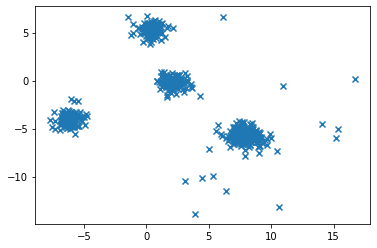

In [ ]:
# Create Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] 
plt.scatter(X[:,0],X[:,1],marker="x");

## Dibuat dengan data dummy untuk demo
## Ada ada data yang normal dan outliers, akan dideteksi yang outliers


In [ ]:
# Display Shape of `X`
## 500 data normal dan 20 data outliers
print('Shape of `X` : ', X.shape)

Shape of `X` :  (520, 2)


### Gaussian Mixtures Model

Cluster :  1 	AIC :  6170.397176156694
Cluster :  2 	AIC :  5130.078642644162
Cluster :  3 	AIC :  4419.656042364595
Cluster :  4 	AIC :  4048.652073983156
Cluster :  5 	AIC :  3638.846340164737
Cluster :  6 	AIC :  3649.5949055096316
Cluster :  7 	AIC :  3650.406012463379
Cluster :  8 	AIC :  3657.8220656899016


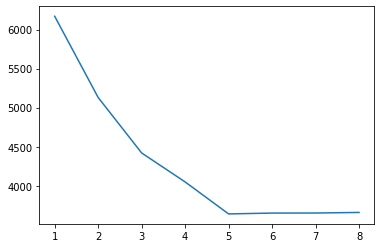

In [ ]:
# Check `k` Optimum

aic = []
##Dicari dulu nilai k nya berapa dari cluster 1-8
for i in range(1,9):
    aic.append(GaussianMixture(n_components=i, random_state=1).fit(X).aic(X))

plt.plot(range(1, 9), aic)

for k in range(0, 8):
  print('Cluster : ', k+1, '\tAIC : ', aic[k])
  
##Didapat nilai AIC terendah di cluster ke-5

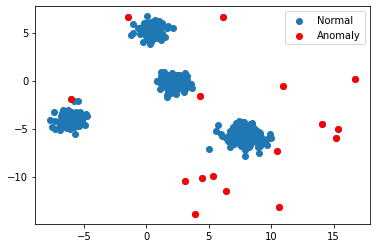

In [ ]:
# Train Gaussian Mixture Model with the Best `k`
##Di train ulang
gausMix = GaussianMixture(n_components=5).fit(X)

##Untuk mendeteksi outliers tidak dilakukan predict (untuk clustering)
##Untuk mendeteksi outliers cari likelihood-nya (kemiripan data dengan centorid nya)
##Dari 520 data tadi berarti akan ada 520 nilai likelihood
# Check Likelihood between samples
scores = gausMix.score_samples(X)

##Di set 5% threshold nya, semakin kecil nilai nya berarti outliersnya semakin jauh
##Penentuan theshold diliat dari visualisasinya
# Define Threshold for Anomaly
thresh = np.quantile(scores, 0.03)

# Get Anomaly Data
index = np.where(scores <= thresh)
outliers = X[index]

# Plot Anomaly Data
plt.scatter(X[:,0], X[:,1],label='Normal')
plt.scatter(outliers[:,0],outliers[:,1], color='r', label='Anomaly')
plt.legend()
plt.show()

In [ ]:
# Display Anomaly Threshold and Anomaly Data

print('Threshold       : ', thresh)
print('Outlier - Index : \n', index)
print('Outlier - Data  : \n', outliers)

Threshold       :  -7.979752635455372
Outlier - Index : 
 (array([341, 500, 504, 505, 507, 508, 509, 510, 511, 513, 514, 515, 516,
       517, 518, 519]),)
Outlier - Data  : 
 [[ -1.46871311   6.66684363]
 [  4.25678797  -1.59486998]
 [  4.45646283 -10.1062986 ]
 [  6.39026357 -11.52395964]
 [ 15.32705171  -5.01208737]
 [  3.13038035 -10.463176  ]
 [ 10.43200414  -7.35428131]
 [  5.30210648  -9.91953249]
 [ 10.63888368 -13.11603437]
 [  5.02598904  -7.08940168]
 [ 10.97675248  -0.57793744]
 [  3.91375094 -13.88407923]
 [ 14.08888899  -4.57183612]
 [ 16.70130116   0.19681847]
 [  6.15418548   6.59371936]
 [ 15.22230759  -5.99451461]]


### Isolation Forest

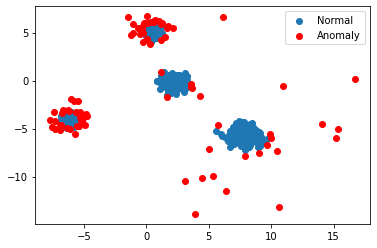

In [ ]:
# Train and Predict Anomaly Data with Isolation Forest

## Import library
from sklearn.ensemble import IsolationForest

## Dari 520 data tadi dibuat 50 tree untuk mencari berapa nilai kedalaman masing-masing node untuk diisolasi
## Train the model
clf = IsolationForest(n_estimators=50)
clf.fit(X)

## Predict anomaly data
labels = clf.predict(X)
##Ketika di predict akan muncul 2 label

## If `label = 1` : not anomaly data. 
## If `label = -1` : anomaly data. 
normal = np.where(labels==1)
outlier = np.where(labels==-1)

## Plot Anomaly Data
plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

### One Class SVM

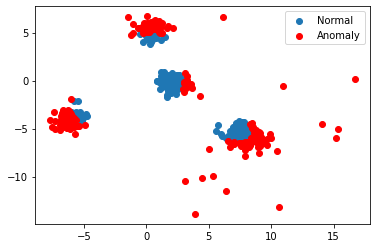

In [ ]:
# Train and Predict Anomaly Data with One Class SVM

## Import library
from sklearn.svm import OneClassSVM

## Train the model
## Tetap dipakai beberapa hyperparameter dari SVM
## parameter yang bisa dipakai kernel, nu(threshold)
clf = OneClassSVM(kernel='rbf')
clf.fit(X)

## Predict anomaly data
labels = clf.predict(X)

##Menghasilkan 2 label
## If `label = 1` : not anomaly data. 
## If `label = -1` : anomaly data. 
normal = np.where(labels==1)
outlier = np.where(labels==-1)


## Plot Anomaly Data
plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

### Local Outlier Factor

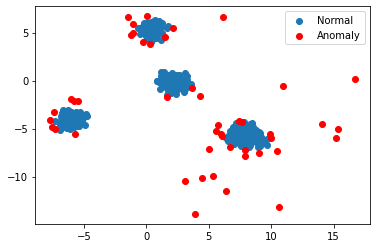

In [ ]:
# Train and Predict Anomaly Data with Local Outlier Factor

## Import library
from sklearn.neighbors import LocalOutlierFactor

## Train the model and predict anomaly data
lof = LocalOutlierFactor(n_neighbors=15)
labels = lof.fit_predict(X)

## If `label = 1` : not anomaly data. 
## If `label = -1` : anomaly data. 
normal = np.where(labels==1)
outlier = np.where(labels==-1)

## Plot Anomaly Data
plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

## Novelty Detection

### Generate Dataset

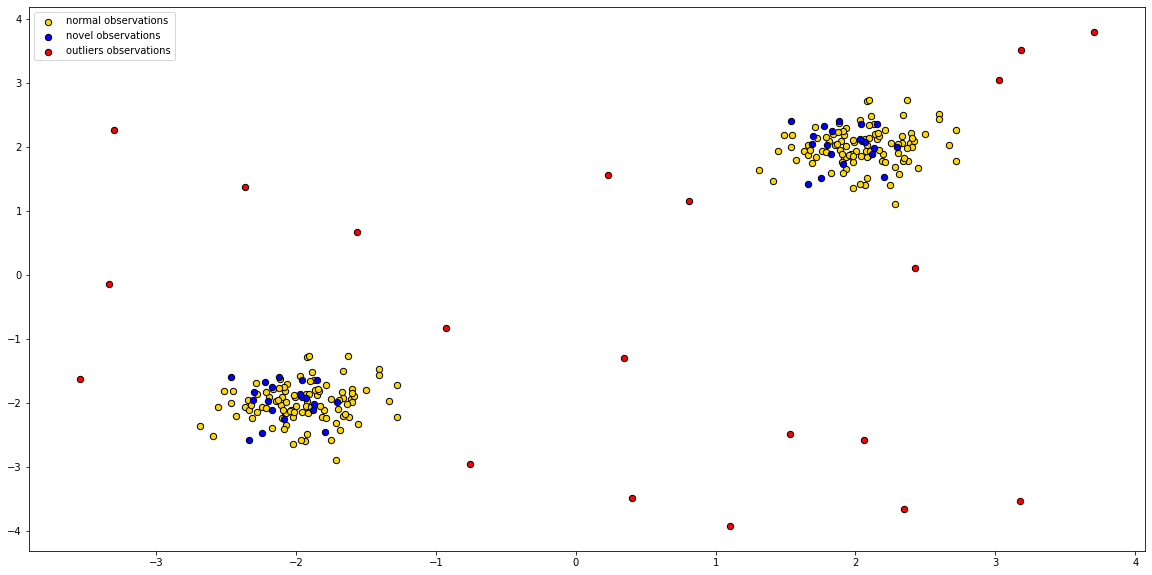

In [ ]:
# Create Dataset
## Dibuat 3 jenis data
## yang kuning data normal yang akan di training
## yang biru data novel tidak akan di tarining tapi di uji coba apakah data tersebut bisa dideteksi sebagai novelty
## yang emrah data outliers


## Generate some normal observations
np.random.seed(10)
X_1 = 0.3 * np.random.randn(100, 2)
X_normal = np.r_[X_1 + 2, X_1 - 2]

## Generate some regular novel observations
X_1 = 0.3 * np.random.randn(20, 2)
X_novel = np.r_[X_1 + 2, X_1 - 2]

## Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

## Plot dataset
plt.figure(figsize=(20, 10))
plt.scatter(X_normal[:, 0], X_normal[:, 1], c="gold", s=40, edgecolors="k",label='normal observations')
plt.scatter(X_novel[:, 0], X_novel[:, 1], c="blue", s=40, edgecolors="k", label='novel observations')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=40, edgecolors="k", label='outliers observations')
plt.legend()

Based on above syntax, we create 3 types of data : 

1. `X_normal` : **normal data** without any outliers or strange data.

2. `X_novel` : this is basically same with `X_train` (normal data without any outliers or strange data), but this data is **used to check model performance regarding of unseen/novel data**.

3. `X_outliers` : **outlier data**.

In [ ]:
# Display Shape of `X_train`, `X_novel`, and `X_outliers`

print('Shape of `X_normal`   : ', X_normal.shape)
print('Shape of `X_novel`    : ', X_novel.shape)
print('Shape of `X_outliers` : ', X_outliers.shape)

Shape of `X_normal`   :  (200, 2)
Shape of `X_novel`    :  (40, 2)
Shape of `X_outliers` :  (20, 2)


### Isolation Forest

Prediction - X_novel label    : 
 [-1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1]
Prediction - X_outliers label : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


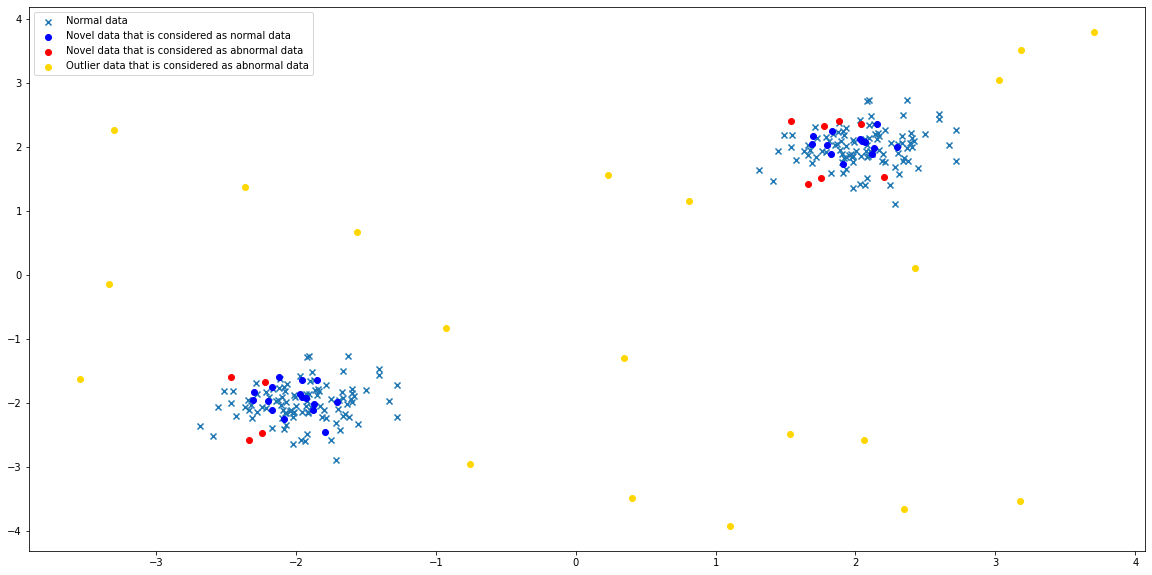

In [ ]:
# Train and Predict Novelty Data with Isolation Forest

## Train the model
clf = IsolationForest(n_estimators=50)
clf.fit(X_normal)

## Predict novelty data
labels = clf.predict(X_novel)
out_nov = clf.predict(X_outliers)

print('Prediction - X_novel label    : \n',labels)
print('Prediction - X_outliers label : \n',out_nov)

## If `label = 1` : normal data. 
## If `label = -1` : abnormal data. 
normal = np.where(labels==1)
abnormal = np.where(labels==-1)

## Plot Abnormal Data
plt.figure(figsize=(20, 10))
plt.scatter(X_normal[:,0],X_normal[:,1],marker='x',label='Normal data')
plt.scatter(X_novel[normal,0], X_novel[normal,1], color='blue', label='Novel data that is considered as normal data')
plt.scatter(X_novel[abnormal,0], X_novel[abnormal,1], color='r', label='Novel data that is considered as abnormal data')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color='gold', label = 'Outlier data that is considered as abnormal data')
plt.legend()
plt.show()

##Dari hasilnya, untuk outliers benar semua terdeteksi sebagai outliers
##Data novel, ada sebagian dianggap outliers ada yang dianggap data normal

### One Class SVM

Prediction - X_novel label    : 
 [-1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1]
Prediction - X_outliers label : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


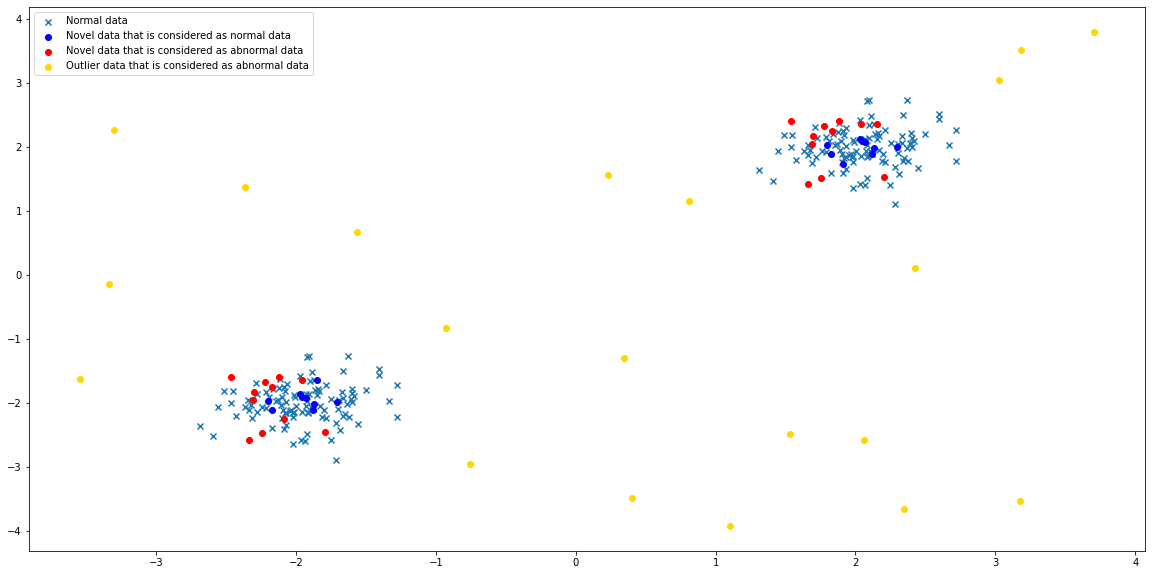

In [ ]:
# Train and Predict Novelty Data with One Class SVM

## Train the model
clf = OneClassSVM(kernel='rbf')
clf.fit(X_normal)

## Predict abnormal data
labels = clf.predict(X_novel)
out_nov = clf.predict(X_outliers)

print('Prediction - X_novel label    : \n',labels)
print('Prediction - X_outliers label : \n',out_nov)

## If `label = 1` : normal data. 
## If `label = -1` : abnormal data. 
normal = np.where(labels==1)
abnormal = np.where(labels==-1)

## Plot Abnormal Data
plt.figure(figsize=(20, 10))
plt.scatter(X_normal[:,0],X_normal[:,1],marker='x',label='Normal data')
plt.scatter(X_novel[normal,0], X_novel[normal,1], color='blue', label='Novel data that is considered as normal data')
plt.scatter(X_novel[abnormal,0], X_novel[abnormal,1], color='r', label='Novel data that is considered as abnormal data')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color='gold', label = 'Outlier data that is considered as abnormal data')
plt.legend()
plt.show()

##Dari hasilnya, untuk outliers benar semua terdeteksi sebagai outliers
##Data novel, ada sebagian dianggap outliers ada yang dianggap data normal

### Local Outlier Factor

In [ ]:
abnormal

(array([ 0,  1,  2,  4,  5,  8,  9, 10, 11, 15, 19, 20, 21, 22, 24, 25, 28,
        30, 31, 35, 38, 39]),)

Prediction - X_novel label    : 
 [ 1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1]
Prediction - X_outliers label : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


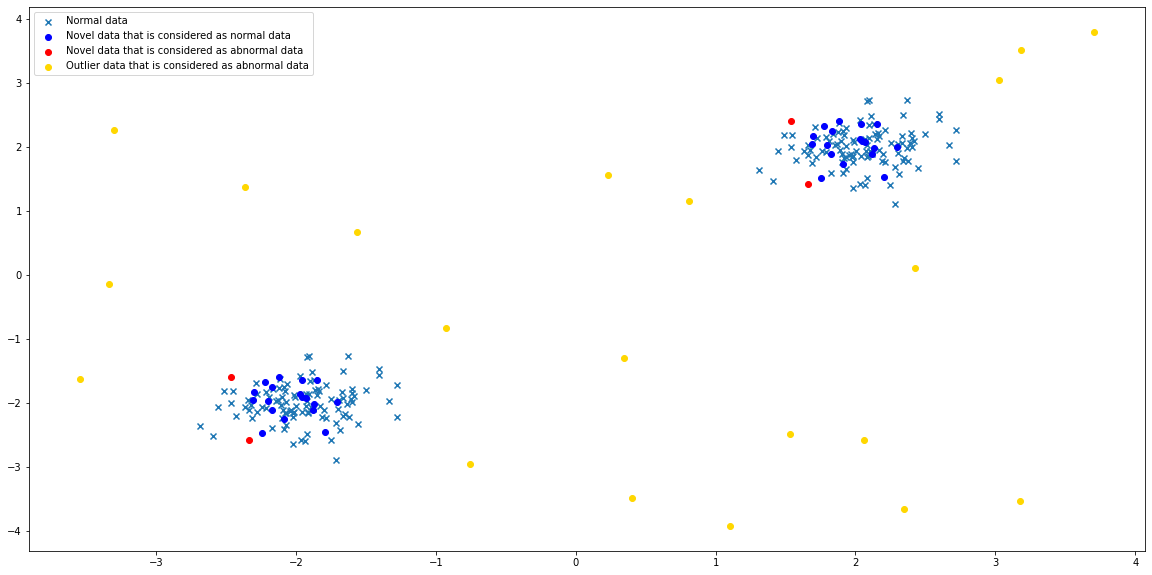

In [ ]:
# Train and Predict Novelty Data with Local Outlier Factor

#Ada parameter novelty
## Train the model
lof = LocalOutlierFactor(n_neighbors=5, novelty=True)
lof.fit(X_normal)

## Predict abnormal data
labels = lof.predict(X_novel)
out_nov = lof.predict(X_outliers)

print('Prediction - X_novel label    : \n',labels)
print('Prediction - X_outliers label : \n',out_nov)

## If `label = 1` : normal data. 
## If `label = -1` : abnormal data. 
normal = np.where(labels==1)
abnormal = np.where(labels==-1)

## Plot Abnormal Data
plt.figure(figsize=(20, 10))
plt.scatter(X_normal[:,0],X_normal[:,1],marker='x',label='Normal data')
plt.scatter(X_novel[normal,0], X_novel[normal,1], color='blue', label='Novel data that is considered as normal data')
plt.scatter(X_novel[abnormal,0], X_novel[abnormal,1], color='r', label='Novel data that is considered as abnormal data')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color='gold', label = 'Outlier data that is considered as abnormal data')
plt.legend()
plt.show()

#Dari hasilnya, yang terdeteksi novelty hanya sedikit
#Untuk outliers, benar semua